In [23]:
# starting web3 operations
import numpy as np
import json
from web3 import Web3
import matplotlib.pyplot as plt
# ganache_url = "https://ropsten.infura.io/v3/6072fdc3b95c407caa681f63ebaf72b8"
# ganache_url = "https://ropsten.infura.io/v3/0345978e22a6431f9222c56ea1f7b6bd"
ganache_url ="https://lively-dark-firefly.ropsten.quiknode.pro/e98606c11b422cb244ac923a53d36c5b7ea2c17c/"
# ganache_url ="http://127.0.0.1:8545"
web3 = Web3(Web3.HTTPProvider(ganache_url))
web3.isConnected()

True

In [24]:
# Basic web3 
# block = web3.eth.get_block('latest')
# balance_1 = web3.eth.getBalance("0x37bfB436392DaAE0E91EdcD9c4128FBcADF3919d")
# print(web3.fromWei(balance_1,'ether'))

In [25]:
abi = json.loads('[ { "constant": true, "inputs": [], "name": "print_l2", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": false, "inputs": [ { "name": "l1_output", "type": "int256[]" }, { "name": "w1", "type": "int256[]" }, { "name": "w2", "type": "int256[]" }, { "name": "w3", "type": "int256[]" }, { "name": "w4", "type": "int256[]" }, { "name": "w5", "type": "int256[]" }, { "name": "w6", "type": "int256[]" }, { "name": "w7", "type": "int256[]" }, { "name": "w8", "type": "int256[]" }, { "name": "w9", "type": "int256[]" }, { "name": "w10", "type": "int256[]" }, { "name": "b2", "type": "int256[]" } ], "name": "multiply_layer2", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": false, "inputs": [ { "name": "x", "type": "int256[]" }, { "name": "w1", "type": "int256[]" }, { "name": "w2", "type": "int256[]" }, { "name": "w3", "type": "int256[]" }, { "name": "w4", "type": "int256[]" }, { "name": "b1", "type": "int256[]" } ], "name": "multiply_layer1", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [], "name": "print_l1", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')
cont_address = "0x473AfDf150c0D98e00c35486f4064ccBCccc557B"

In [26]:
contract = web3.eth.contract(address=cont_address,abi=abi)

In [27]:
account1 = "0xdd617f9D5120b7b30E4C502fdd6b13dCf286A300"
private_key1="c00b36dc1777e7fda60ff1f55b57c3f51b18c0c16fe44724e451ed062a173d74"
account2 = "0x8883f1016E727C8fE93C1Df471f102bBbAF2B910"
private_key2="8d70f54549b5fb7c04fc016cc88c447fc81aff3af3065c696aee1b529fbc8ba5"
account3= "0xd39fdd79c3b5b0c411366D5A64ba26E423e1cF61"
private_key3="3f3bcef69f8cef4bb28953eebe0b11c40fca5b4ce8c9665d3647afd067050952"


In [6]:
# account1 = "0xf7F64F93f6f9cD2A45ee5B988Fc9E6287f54538f"
# private_key1="287fbd4b3d7ae13da6ac9acace18dff2d2b9de57e763240fa67a1bb2cc1c23a4"
# account2 = "0x3B21a7543d25BCaD95a9Cb63320e59B07D12e562"
# private_key2="e586cb712d930a0aa341a3f8a6bc50e7bebf45b39a1f82a3a8ba6379de0ea2e4"

In [7]:
nonce = web3.eth.getTransactionCount(account1)

In [69]:
def getlayer1(x,w11,w12,w13,w14,b1):
    
    transaction = contract.functions.multiply_layer1(
        x,w11,w12,w13,w14,b1
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('1', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash,timeout=300)
    return tx_receipt.gasUsed

In [42]:
# print(contract.functions.setallexpon().call())
# print("value of sigmoid is:", n/d)

In [43]:
def getlayer2(l1,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,b2):
    nonce = web3.eth.getTransactionCount(account2)
    transaction = contract.functions.multiply_layer2(
        l1,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,b2
         ).buildTransaction({
        'gas': 6700000,
        'gasPrice': web3.toWei('1', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash,timeout=1000)
    return tx_receipt.gasUsed

In [44]:
def getsoftmax():
    nonce = web3.eth.getTransactionCount(account2)
    transaction = contract.functions.get_softmax(
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

In [45]:
print(contract.functions.print_l1().call())

[0, 0, 0, 0]


In [46]:
print(contract.functions.print_l2().call())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [52]:
x = np.arange(1,100).tolist()
w1 = np.arange(1,100).tolist()
w2 = np.arange(1,100).tolist()
w3 = np.arange(1,100).tolist()
w4 = np.arange(1,100).tolist()
b1 = np.arange(1,5).tolist()

In [53]:
print(x,',',w1,',',w2,',',w3,',',w4,',',b1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 

In [70]:
# nonce = web3.eth.getTransactionCount(account1)
getlayer1(x,w1,w2,w3,w4,b1)

ValueError: {'code': -32010, 'message': 'Transaction gas price supplied is too low. There is another transaction with same nonce in the queue. Try increasing the gas price or incrementing the nonce.'}

In [283]:
print(contract.functions.print_l1().call())

[160322905, 160322906, 160322907, 160322908]


In [66]:
x = np.arange(1,5).tolist()
w1 = np.arange(1,5).tolist()
w2 = np.arange(1,5).tolist()
w3 = np.arange(1,5).tolist()
w4 = np.arange(1,5).tolist()
w5 = np.arange(1,5).tolist()
w6 = np.arange(1,5).tolist()
w7 = np.arange(1,5).tolist()
w8 = np.arange(1,5).tolist()
w9 = np.arange(1,5).tolist()
w10 = np.arange(1,5).tolist()
b2 = np.arange(1,11).tolist()

In [68]:
print(x,',',w1,',',w2,',',w3,',',w4,',',w5,',',w6,',',w7,',',w8,',',w9,',',w10,',',b2)

[1, 2, 3, 4] , [1, 2, 3, 4] , [1, 2, 3, 4] , [1, 2, 3, 4] , [1, 2, 3, 4] , [1, 2, 3, 4] , [1, 2, 3, 4] , [1, 2, 3, 4] , [1, 2, 3, 4] , [1, 2, 3, 4] , [1, 2, 3, 4] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [65]:
getlayer2(x,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,b2)

ValueError: {'code': -32000, 'message': 'nonce too low'}

In [19]:
## testing softmax out of blockchain
def softmax(x):
    sumexp = np.sum(np.exp(x))
    return(np.exp(x)/sumexp)

x = np.arange(-20,20)
# print(softmax(x))
y = softmax(x)


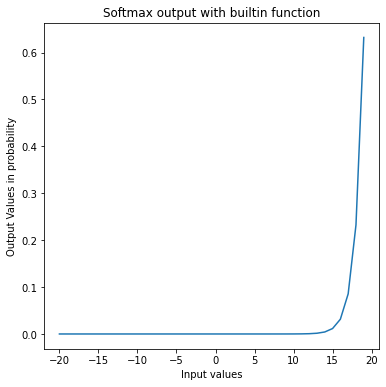

In [20]:
plt.figure(figsize=(6,6))
plt.plot(x,y)
plt.title("Softmax output with builtin function")
plt.xlabel("Input values")
plt.ylabel("Output Values in probability")
plt.savefig("softmax-off-chain.pdf")

In [21]:
expongas=[]
softexpogas=[]
for i in range(len(a)):
    expongas.append(getexpon(int(x[i]),int(a[i]), abs(int(x[i])),abs(int(a[i]))))
gas_sumexpo = getsumexpon()
soft_gas = getsoftmax()
smaxn,smaxd = contract.functions.set_softmax().call()
print(smaxn,smaxd)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 7, 19, 54, 147, 399, 1085, 2946, 7996, 21704, 58913, 159906, 434032, 1178088, 3197668, 8679385, 23558331, 63944043, 173562404] [274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130, 274807130]


In [22]:
softn = np.array(smaxn)
softd = np.array(smaxd)
from textwrap import wrap

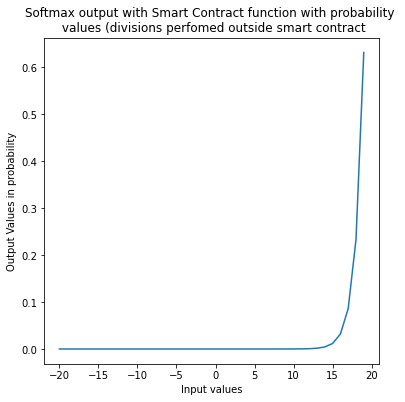

In [23]:
# print(softn/softd)
plt.figure(figsize=(6,6))
plt.plot(x,softn/softd)

plt.title('Softmax output with Smart Contract function with probability \n values (divisions perfomed outside smart contract')
plt.xlabel("Input values")
plt.ylabel("Output Values in probability")
plt.savefig("softmax-on-chain.pdf")

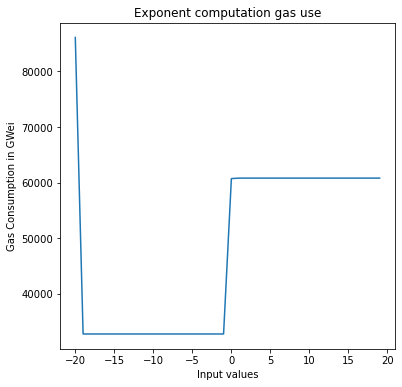

In [24]:
expongas = np.array(expongas)
softexpogas= np.array(softexpogas)
plt.figure(figsize=(6,6))
plt.plot(x,expongas)
plt.title("Exponent computation gas use")
plt.xlabel("Input values")
plt.ylabel("Gas Consumption in GWei")
plt.savefig("exponent_computation_gas.pdf")

In [25]:
print(gas_sumexpo) 
print(soft_gas) 

208914
1548981


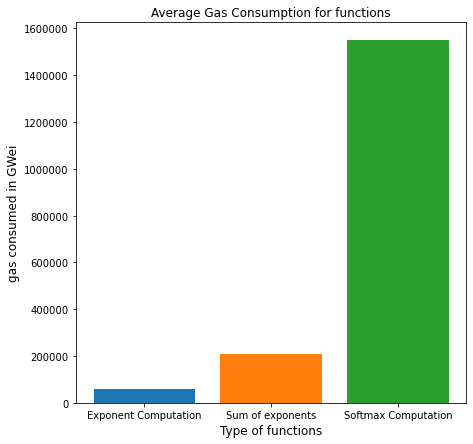

In [26]:
plt.figure(figsize=(7,7))
plt.ticklabel_format(style='plain') 
plt.bar("Exponent Computation", expongas[30])
plt.bar("Sum of exponents", gas_sumexpo)
plt.bar("Softmax Computation", soft_gas)

plt.title("Average Gas Consumption for functions",fontsize=12)
plt.xlabel("Type of functions",fontsize=12)
plt.ylabel("gas consumed in GWei",fontsize=12)
plt.savefig("softmax_gas.pdf",bbox_inches='tight')

In [27]:
# default sigmoid from system
import math
import numpy as np
def sigmoid(x,y):
    sig = 1 / (1 + math.exp(-x/y))
    return sig

In [128]:
a_list = list(range(-100, 101))
a_val_num = np.array(a_list)
a_val_den = np.full(201,10)

In [129]:
sig_b=np.zeros(201)
for i in range(len(a_val_num)):
    sig_b[i] = sigmoid(int(a_val_num[i]),int(a_val_den[i]))
    

In [130]:
sig_e=np.zeros(201)
gasUse =[]
for i in range(len(a_val_num)):
    if (a_val_num[i]<0):
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]*(-1)),int(a_val_den[i])))
    else:
        gasUse.append(sigfrac(int(a_val_num[i]),int(a_val_den[i]),int(a_val_num[i]),int(a_val_den[i]))) 
    n, d = contract.functions.sigprint().call()
    
    sig_e[i] = n/d

In [131]:
sig_b

array([4.53978687e-05, 5.01721647e-05, 5.54485247e-05, 6.12797396e-05,
       6.77241496e-05, 7.48462275e-05, 8.27172229e-05, 9.14158739e-05,
       1.01029194e-04, 1.11653341e-04, 1.23394576e-04, 1.36370327e-04,
       1.50710358e-04, 1.66558065e-04, 1.84071905e-04, 2.03426978e-04,
       2.24816770e-04, 2.48455082e-04, 2.74578156e-04, 3.03447030e-04,
       3.35350130e-04, 3.70606141e-04, 4.09567165e-04, 4.52622223e-04,
       5.00201107e-04, 5.52778637e-04, 6.10879359e-04, 6.75082731e-04,
       7.46028834e-04, 8.24424686e-04, 9.11051194e-04, 1.00677082e-03,
       1.11253603e-03, 1.22939862e-03, 1.35851995e-03, 1.50118226e-03,
       1.65880108e-03, 1.83293894e-03, 2.02532039e-03, 2.23784852e-03,
       2.47262316e-03, 2.73196076e-03, 3.01841632e-03, 3.33480731e-03,
       3.68423990e-03, 4.07013772e-03, 4.49627316e-03, 4.96680165e-03,
       5.48629890e-03, 6.05980149e-03, 6.69285092e-03, 7.39154134e-03,
       8.16257115e-03, 9.01329865e-03, 9.95180187e-03, 1.09869426e-02,
      

In [132]:
sig_e

array([0.00000000e+00, 7.00000000e-05, 7.00000000e-05, 7.00000000e-05,
       7.00000000e-05, 7.00000000e-05, 7.00000000e-05, 7.00000000e-05,
       7.00000000e-05, 7.00000000e-05, 7.00000000e-05, 2.00000000e-04,
       2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
       2.00000000e-04, 2.00000000e-04, 2.00000000e-04, 2.00000000e-04,
       2.00000000e-04, 6.00000000e-04, 6.00000000e-04, 6.00000000e-04,
       6.00000000e-04, 6.00000000e-04, 6.00000000e-04, 6.00000000e-04,
       6.00000000e-04, 6.00000000e-04, 6.00000000e-04, 1.50000000e-03,
       1.50000000e-03, 1.50000000e-03, 1.50000000e-03, 1.50000000e-03,
       1.50000000e-03, 1.50000000e-03, 1.50000000e-03, 1.50000000e-03,
       1.50000000e-03, 2.75852376e-03, 3.04491770e-03, 3.36197746e-03,
       3.71279879e-03, 4.10076713e-03, 4.52959481e-03, 5.00336651e-03,
       5.52659264e-03, 6.10426819e-03, 6.74193090e-03, 7.45218103e-03,
       8.22185966e-03, 9.07307572e-03, 1.00138605e-02, 1.10529526e-02,
      

In [133]:
d = np.arange(-1.0, 1.01, 0.01)
d

array([-1.0000000e+00, -9.9000000e-01, -9.8000000e-01, -9.7000000e-01,
       -9.6000000e-01, -9.5000000e-01, -9.4000000e-01, -9.3000000e-01,
       -9.2000000e-01, -9.1000000e-01, -9.0000000e-01, -8.9000000e-01,
       -8.8000000e-01, -8.7000000e-01, -8.6000000e-01, -8.5000000e-01,
       -8.4000000e-01, -8.3000000e-01, -8.2000000e-01, -8.1000000e-01,
       -8.0000000e-01, -7.9000000e-01, -7.8000000e-01, -7.7000000e-01,
       -7.6000000e-01, -7.5000000e-01, -7.4000000e-01, -7.3000000e-01,
       -7.2000000e-01, -7.1000000e-01, -7.0000000e-01, -6.9000000e-01,
       -6.8000000e-01, -6.7000000e-01, -6.6000000e-01, -6.5000000e-01,
       -6.4000000e-01, -6.3000000e-01, -6.2000000e-01, -6.1000000e-01,
       -6.0000000e-01, -5.9000000e-01, -5.8000000e-01, -5.7000000e-01,
       -5.6000000e-01, -5.5000000e-01, -5.4000000e-01, -5.3000000e-01,
       -5.2000000e-01, -5.1000000e-01, -5.0000000e-01, -4.9000000e-01,
       -4.8000000e-01, -4.7000000e-01, -4.6000000e-01, -4.5000000e-01,
      

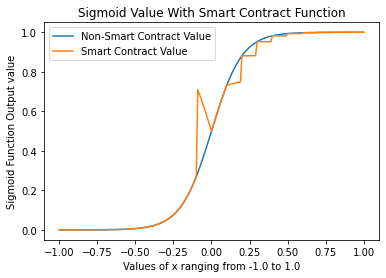

In [134]:
import matplotlib.pyplot as plt
plt.plot(d, sig_b, label = "Non-Smart Contract Value")
plt.plot(d, sig_e, label = "Smart Contract Value")
plt.xlabel("Values of x ranging from -1.0 to 1.0")
plt.ylabel("Sigmoid Function Output value")
plt.title("Sigmoid Value With Smart Contract Function")
plt.legend()
# plt.savefig("sigmoid_output.pdf")
plt.show()

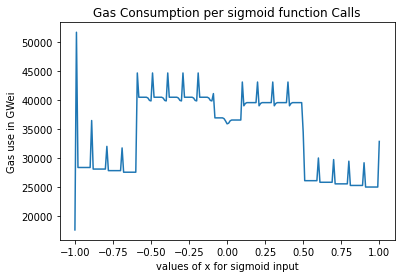

In [135]:
plt.plot(d, gasUse, label="gas Used Per Function Call")
plt.title("Gas Consumption per sigmoid function Calls")
plt.ylabel("Gas use in GWei")
plt.xlabel("values of x for sigmoid input")
# plt.savefig("sigmoid_gas.pdf")
plt.show()

In [8]:
x = np.arange(1,800).tolist()
w1 = np.arange(1,800).tolist()
w2 = np.arange(1,800).tolist()
w3 = np.arange(1,800).tolist()
w4 = np.arange(1,800).tolist()
b1 = np.arange(1,5).tolist()
print(x,',',w1,',',w2,',',w3,',',w4,',',b1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
x = np.arange(1,5).tolist()
w1 = np.arange(1,5).tolist()
w2 = np.arange(1,5).tolist()
w3 = np.arange(1,5).tolist()
w4 = np.arange(1,5).tolist()
w5 = np.arange(1,5).tolist()
w6 = np.arange(1,5).tolist()
w7 = np.arange(1,5).tolist()
w8 = np.arange(1,5).tolist()
w9 = np.arange(1,5).tolist()
w10 = np.arange(1,5).tolist()
b2 = np.arange(1,11).tolist()
print(x,',',w1,',',w2,',',w3,',',w4,',',w5,',',w6,',',w7,',',w8,',',w9,',',w10,',',b2)

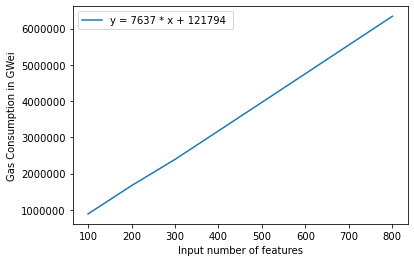

In [7]:
## NN layer 1 outputs
input_features=[100,200,300,400,500,600,700,800]
plt.ticklabel_format(style='plain')
gas_used_local = [885569,1665993,2389954,3176893,3966139, 4756382,5549139,6339845 ] 
plt.xlabel("Input number of features")
plt.ylabel("Gas Consumption in GWei")
lab = "y = 7637 * x + 121794 "
plt.plot(input_features, gas_used_local, label = lab)
plt.legend()
plt.savefig("layer1-nn-gas.pdf")

In [5]:
#get quation of a line

def slope(y1,y2,x1,x2):
    m = (y2-y1)/(x2-x1)
    c = y2 -m*x2
    print(m,c)

In [6]:
slope(gas_used_local[0],gas_used_local[3],input_features[0],input_features[3])

7637.746666666667 121794.33333333302


In [ ]:
Neurons = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
gas = 